In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

In [15]:
folder1 = r"C:\Users\jiali\Documents\Studium\DM-Dataset\literature.stackexchange.com\Literature_CSV_raw"
file1 = "literaturePosts_with_sentiment.csv"
path1 = os.path.join(folder1, file1)
df_posts_literature = pd.read_csv(path1)

folder2 = r"C:\Users\jiali\Documents\Studium\DM-Dataset\physics.stackexchange.com\CSV"
file2 = "Posts_with_sentiment.csv" 
path2 = os.path.join(folder2, file2)
df_posts_physics = pd.read_csv(path2)

folder3 = r"C:\Users\jiali\Documents\Studium\DM-Dataset\math.stackexchange.com\CSV"
file3 = "math_sentiment_results.csv" 
path3 = os.path.join(folder3, file3)
df_posts_math = pd.read_csv(path3)

In [16]:
df_posts_literature

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,...,LastEditorDisplayName,AcceptedAnswerId,ParentId,OwnerDisplayName,FavoriteCount,CommunityOwnedDate,ClosedDate,CleanBodyNoMath,SentimentLabel,SentimentScore
0,1,1,2017-01-18 17:20:34.290,39,2314.0,Is there any proof that Svidrigailov actually ...,3.0,58.0,2017-11-18 18:40:59.093,2017-11-18 18:40:59.093,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Is there any proof that Svidrigailov actually ...,negative,0.6875
1,2,1,2017-01-18 17:25:47.547,34,4129.0,It's well known that Shakespeare had no part i...,17.0,NaN,NaN,2018-12-14 16:40:18.023,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,It's well known that Shakespeare had no part i...,negative,0.5159
2,3,1,2017-01-18 17:29:14.640,28,9610.0,In the recent adaptation of Lemony Snicket's A...,16.0,11259.0,2021-03-08 05:51:57.980,2021-03-08 05:51:57.980,...,user111,0.0,NaN,NaN,NaN,NaN,NaN,In the recent adaptation of Lemony Snicket's A...,neutral,0.5967
3,4,1,2017-01-18 17:30:46.127,28,20501.0,"In Brave New World, there is an extensive cast...",10.0,11259.0,2021-02-14 23:17:31.870,2023-04-02 19:15:47.427,...,NaN,37.0,NaN,NaN,NaN,NaN,NaN,"In Brave New World, there is an extensive cast...",neutral,0.7109
4,5,1,2017-01-18 17:31:36.920,35,1603.0,I'm currently (slowly!) working through the co...,17.0,17.0,2017-01-30 19:35:32.300,2017-01-30 19:35:32.300,...,NaN,299.0,NaN,NaN,NaN,NaN,NaN,I'm currently (slowly!) working through the co...,neutral,0.7652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17301,26546,1,2024-03-30 15:51:54.673,1,46.0,Some of the greatest books I have ever read ar...,20500.0,NaN,NaN,2024-03-30 15:51:54.673,...,NaN,0.0,NaN,NaN,NaN,NaN,2024-03-31T16:50:05.107,Some of the greatest books I have ever read ar...,positive,0.5082
17302,26547,2,2024-03-30 16:01:49.290,3,0.0,I believe that phrase is an implication that t...,20500.0,NaN,NaN,2024-03-30 16:01:49.290,...,NaN,0.0,24741.0,NaN,NaN,NaN,NaN,I believe that phrase is an implication that t...,neutral,0.4939
17303,26548,1,2024-03-30 16:20:41.660,-2,83.0,I am looking for a book that teaches parents i...,18231.0,NaN,NaN,2024-03-30 16:20:41.660,...,NaN,0.0,NaN,NaN,NaN,NaN,2024-03-31T04:34:55.137,I am looking for a book that teaches parents i...,neutral,0.5815
17304,26549,1,2024-03-31 00:36:45.513,8,487.0,I'm reading Milton's Sonnet 21 and a couple of...,20519.0,289.0,2024-04-01 00:26:59.127,2024-04-01 09:55:22.770,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,I'm reading Milton's Sonnet 21 and a couple of...,neutral,0.6013


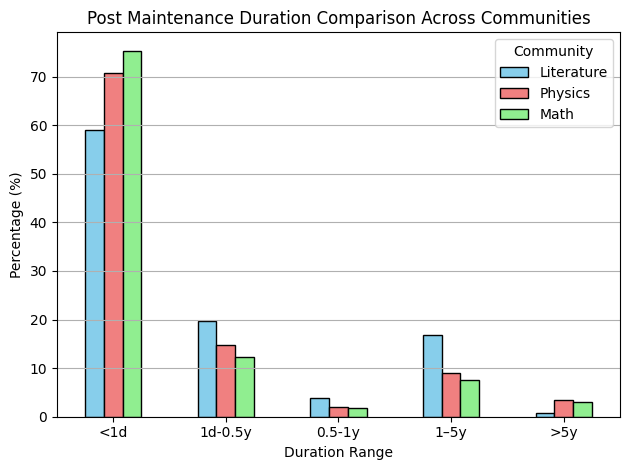

               Literature  Physics   Math
DurationRange                            
<1d                 58.94    70.69  75.33
1d-0.5y             19.79    14.76  12.38
0.5-1y               3.76     2.08   1.72
1–5y                16.77     9.02   7.53
>5y                  0.74     3.45   3.04


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def compute_duration_distribution(df, community_name):
    df = df[df['LastEditDate'].notna()].copy()
    df['MaintainDuration'] = pd.to_datetime(df['LastEditDate']) - pd.to_datetime(df['CreationDate'])
    df['MaintainDurationDays'] = df['MaintainDuration'].dt.total_seconds() / (24 * 3600)

    # 定义时间区间
    bins = [0, 1, 180, 365, 5*365, float('inf')]
    labels = ['<1d', '1d-0.5y', '0.5-1y', '1–5y', '>5y']
    df['DurationRange'] = pd.cut(df['MaintainDurationDays'], bins=bins, labels=labels, right=False)

    # 统计百分比
    distribution = df['DurationRange'].value_counts().sort_index()
    percentage = (distribution / distribution.sum() * 100).round(2)

    # 转换为 DataFrame，方便合并
    return pd.DataFrame({community_name: percentage})

# 分别计算三个社区的分布
dist_lit = compute_duration_distribution(df_posts_literature, 'Literature')
dist_phy = compute_duration_distribution(df_posts_physics, 'Physics')
dist_math = compute_duration_distribution(df_posts_math, 'Math')

# 合并为一个 DataFrame
distribution_df = pd.concat([dist_lit, dist_phy, dist_math], axis=1).fillna(0)

# 绘图
distribution_df.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black')
plt.title('Post Maintenance Duration Comparison Across Communities')
plt.xlabel('Duration Range')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Community')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 打印表格
print(distribution_df)


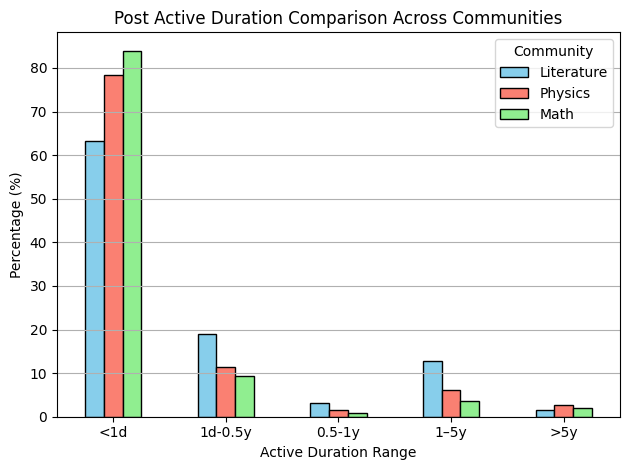


ActiveDurationDays Percentage Comparison:
                     Literature  Physics   Math
ActiveDurationRange                            
<1d                       63.28    78.39  83.97
1d-0.5y                   19.07    11.32   9.43
0.5-1y                     3.26     1.46   0.96
1–5y                      12.83     6.11   3.65
>5y                        1.57     2.73   1.99


In [18]:
def compute_active_duration_distribution(df, community_name):
    df = df[df['LastActivityDate'].notna()].copy()
    df['ActiveDuration'] = pd.to_datetime(df['LastActivityDate']) - pd.to_datetime(df['CreationDate'])
    df['ActiveDurationDays'] = df['ActiveDuration'].dt.total_seconds() / (24 * 3600)

    # 时间区间划分
    bins = [0, 1, 180, 365, 5*365, float('inf')]
    labels = ['<1d', '1d-0.5y', '0.5-1y', '1–5y', '>5y']
    df['ActiveDurationRange'] = pd.cut(df['ActiveDurationDays'], bins=bins, labels=labels, right=False)

    # 统计百分比
    distribution = df['ActiveDurationRange'].value_counts().sort_index()
    percentage = (distribution / distribution.sum() * 100).round(2)

    return pd.DataFrame({community_name: percentage})

# 分别计算三个社区的活跃时间分布
active_lit = compute_active_duration_distribution(df_posts_literature, 'Literature')
active_phy = compute_active_duration_distribution(df_posts_physics, 'Physics')
active_math = compute_active_duration_distribution(df_posts_math, 'Math')

# 合并结果
active_df = pd.concat([active_lit, active_phy, active_math], axis=1).fillna(0)

# 绘制条形图
active_df.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], edgecolor='black')
plt.title('Post Active Duration Comparison Across Communities')
plt.xlabel('Active Duration Range')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Community')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 打印百分比表格
print("\nActiveDurationDays Percentage Comparison:")
print(active_df)

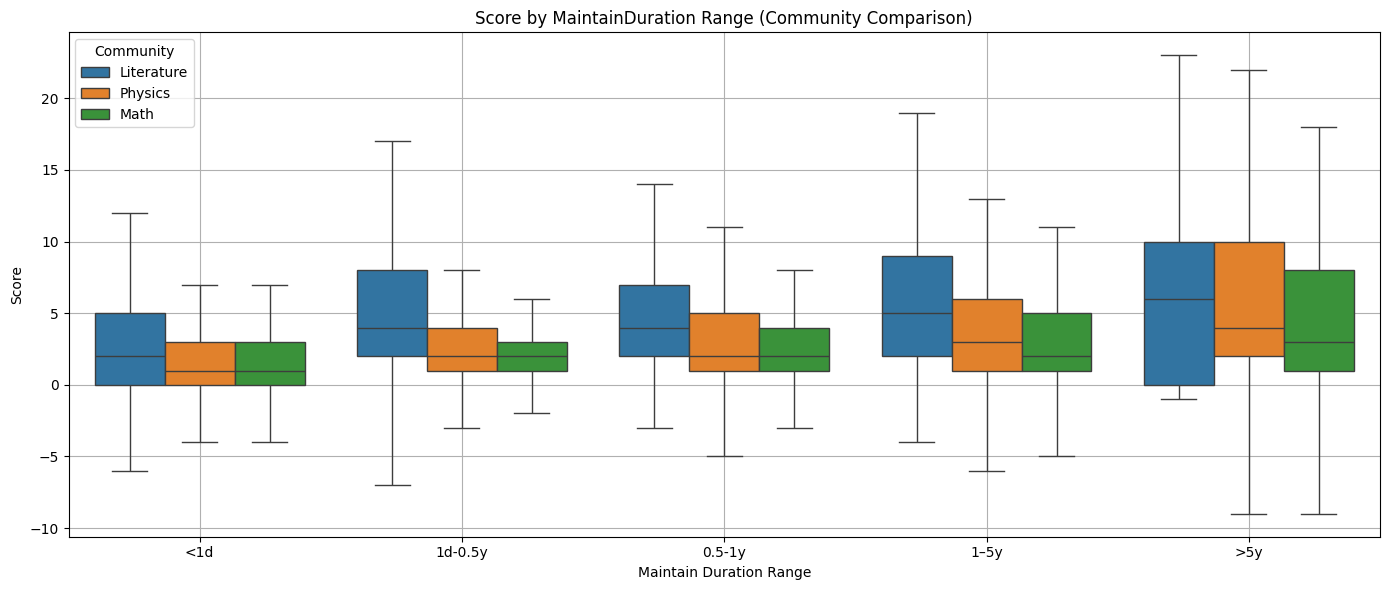

In [19]:
df_lit = df_posts_literature.copy()
df_lit['Community'] = 'Literature'

df_phy = df_posts_physics.copy()
df_phy['Community'] = 'Physics'

df_math = df_posts_math.copy()
df_math['Community'] = 'Math'

df_all = pd.concat([df_lit, df_phy, df_math], ignore_index=True)

df_all = df_all[df_all['LastEditDate'].notna()].copy()
df_all['LastEditDate'] = pd.to_datetime(df_all['LastEditDate'])
df_all['CreationDate'] = pd.to_datetime(df_all['CreationDate'])
df_all['MaintainDurationDays'] = (df_all['LastEditDate'] - df_all['CreationDate']).dt.total_seconds() / (24 * 3600)

bins = [0, 1, 180, 365, 5*365, float('inf')]
labels = ['<1d', '1d-0.5y', '0.5-1y', '1–5y', '>5y']
df_all['DurationRange'] = pd.cut(df_all['MaintainDurationDays'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(14, 6))
sns.boxplot(x='DurationRange', y='Score', hue='Community', data=df_all, showfliers=False)
plt.title('Score by MaintainDuration Range (Community Comparison)')
plt.xlabel('Maintain Duration Range')
plt.ylabel('Score')
plt.grid(True)
plt.legend(title='Community')
plt.tight_layout()
plt.show()


C:\Users\jiali\AppData\Local\Temp\ipykernel_24332\2046404961.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_all.groupby(['Community', 'ViewCountRange'])['Score'].agg(['mean', 'median', 'count']).unstack(0)


                     mean                           median                \
Community      Literature       Math    Physics Literature  Math Physics   
ViewCountRange                                                             
0–100            2.396960   0.728428   0.572889        2.0   1.0     0.0   
101–500          4.280273   1.706634   1.370783        4.0   1.0     1.0   
501–1k           6.256010   2.543965   2.446403        5.0   2.0     2.0   
1k–5k            8.753472   3.779985   4.389203        8.0   2.0     2.0   
5k–10k          12.885714   7.340243  10.125232       11.0   4.0     5.0   
10k–50k         18.097902  13.841280  16.285873       13.0   6.0     7.0   
>50k            20.533333  43.741135  36.390600       19.0  18.0    16.0   

                    count                  
Community      Literature    Math Physics  
ViewCountRange                             
0–100                1645  631872   59069  
101–500              2783  629261   91037  
501–1k             

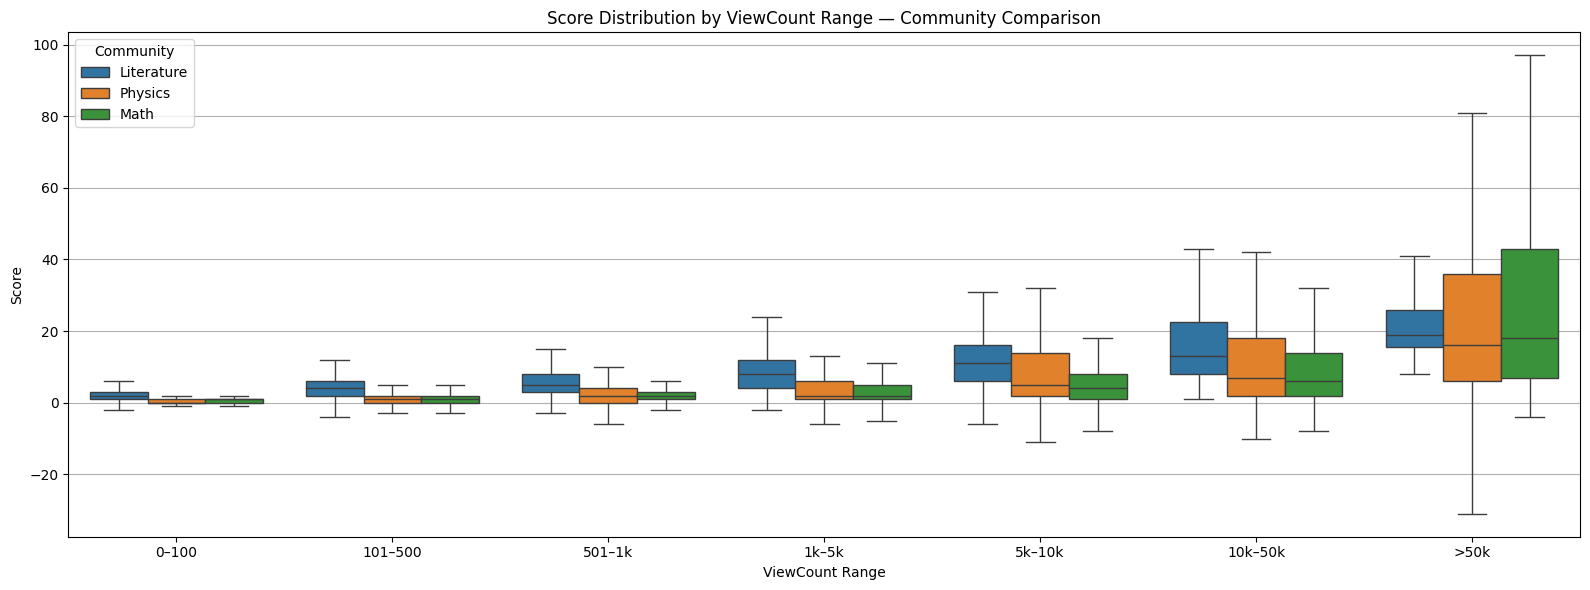

In [20]:
df_lit = df_posts_literature.copy()
df_lit['Community'] = 'Literature'

df_phy = df_posts_physics.copy()
df_phy['Community'] = 'Physics'

df_math = df_posts_math.copy()
df_math['Community'] = 'Math'

# 合并三个 DataFrame
df_all = pd.concat([df_lit, df_phy, df_math], ignore_index=True)

# 分箱定义
bins = [0, 100, 500, 1000, 5000, 10000, 50000, float('inf')]
labels = ['0–100', '101–500', '501–1k', '1k–5k', '5k–10k', '10k–50k', '>50k']

# 添加 ViewCountRange 列
df_all['ViewCountRange'] = pd.cut(df_all['ViewCount'], bins=bins, labels=labels)

# ===== 统计结果（可选打印） =====
grouped = df_all.groupby(['Community', 'ViewCountRange'])['Score'].agg(['mean', 'median', 'count']).unstack(0)
print(grouped)

# ===== Boxplot 可视化 =====
plt.figure(figsize=(16, 6))
sns.boxplot(x='ViewCountRange', y='Score', hue='Community', data=df_all, showfliers=False)
plt.title('Score Distribution by ViewCount Range — Community Comparison')
plt.xlabel('ViewCount Range')
plt.ylabel('Score')
plt.grid(axis='y')
plt.legend(title='Community')
plt.tight_layout()
plt.show()


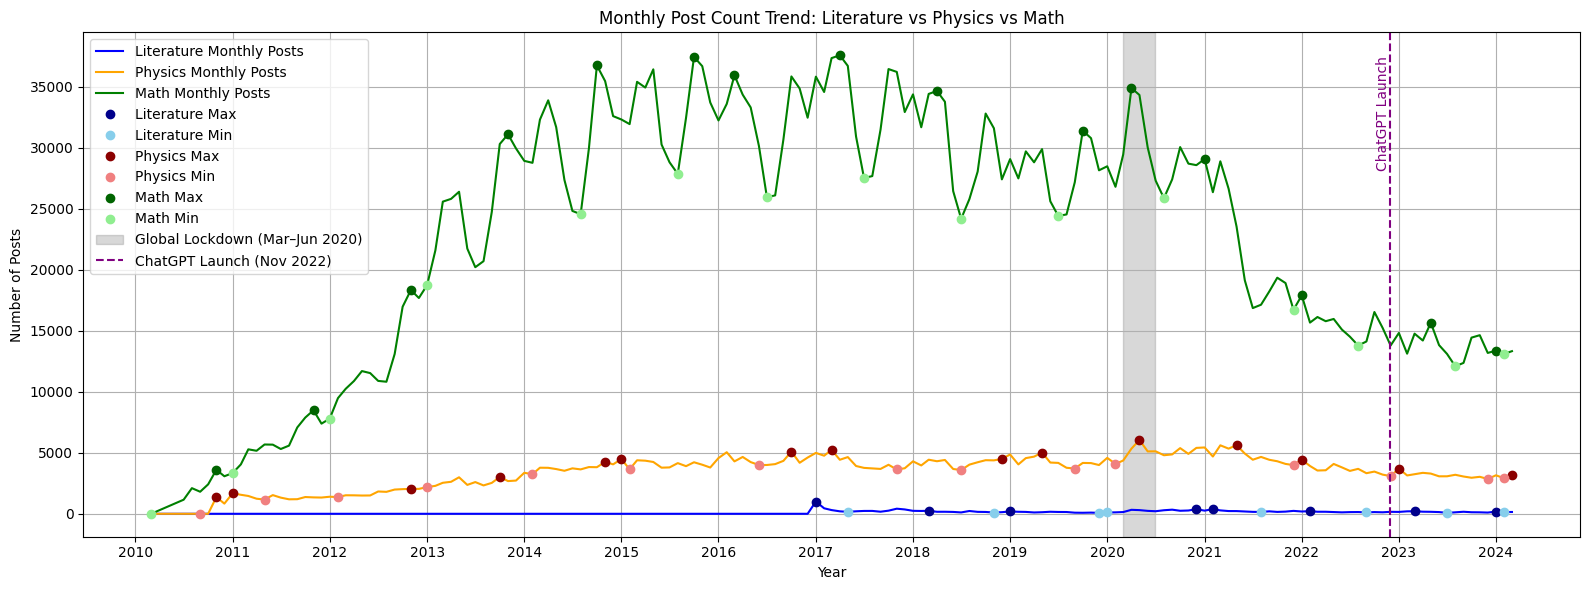

In [21]:
def prepare_monthly_counts(df, community_label):
    df = df.copy()
    df['CreationDate'] = pd.to_datetime(df['CreationDate'])
    df['YearMonth'] = df['CreationDate'].dt.to_period('M')
    monthly_counts = df['YearMonth'].value_counts().sort_index()
    monthly_counts.index = monthly_counts.index.to_timestamp()
    monthly_counts = monthly_counts.rename(community_label)
    return monthly_counts

# 读取三个社区
lit_monthly = prepare_monthly_counts(df_posts_literature, 'Literature')
phy_monthly = prepare_monthly_counts(df_posts_physics, 'Physics')
math_monthly = prepare_monthly_counts(df_posts_math, 'Math')

# 合并成一个总表
combined = pd.concat([lit_monthly, phy_monthly, math_monthly], axis=1).fillna(0)

# 提取极值函数
def get_extremes(series, label):
    df = series.reset_index()
    df.columns = ['YearMonth', 'PostCount']
    df['Year'] = df['YearMonth'].dt.year
    df = df.sort_values(['Year', 'PostCount', 'YearMonth'])
    max_idx = df.groupby('Year')['PostCount'].idxmax()
    min_idx = df.groupby('Year')['PostCount'].idxmin()
    return df.loc[max_idx], df.loc[min_idx]

# 获取各社区的最大/最小点
lit_max, lit_min = get_extremes(lit_monthly, 'Literature')
phy_max, phy_min = get_extremes(phy_monthly, 'Physics')
math_max, math_min = get_extremes(math_monthly, 'Math')

# ======== 绘图 ========
plt.figure(figsize=(16, 6))

# 主趋势线
plt.plot(combined.index, combined['Literature'], label='Literature Monthly Posts', color='blue', linewidth=1.5)
plt.plot(combined.index, combined['Physics'], label='Physics Monthly Posts', color='orange', linewidth=1.5)
plt.plot(combined.index, combined['Math'], label='Math Monthly Posts', color='green', linewidth=1.5)

# 极值点
plt.plot(lit_max['YearMonth'], lit_max['PostCount'], 'o', color='darkblue', label='Literature Max')
plt.plot(lit_min['YearMonth'], lit_min['PostCount'], 'o', color='skyblue', label='Literature Min')

plt.plot(phy_max['YearMonth'], phy_max['PostCount'], 'o', color='darkred', label='Physics Max')
plt.plot(phy_min['YearMonth'], phy_min['PostCount'], 'o', color='lightcoral', label='Physics Min')

plt.plot(math_max['YearMonth'], math_max['PostCount'], 'o', color='darkgreen', label='Math Max')
plt.plot(math_min['YearMonth'], math_min['PostCount'], 'o', color='lightgreen', label='Math Min')

# 特殊事件标注
lockdown_start = datetime(2020, 3, 1)
lockdown_end = datetime(2020, 6, 30)
plt.axvspan(lockdown_start, lockdown_end, color='gray', alpha=0.3, label='Global Lockdown (Mar–Jun 2020)')

chatgpt_launch = datetime(2022, 11, 30)
plt.axvline(chatgpt_launch, color='purple', linestyle='--', linewidth=1.5, label='ChatGPT Launch (Nov 2022)')
plt.text(chatgpt_launch, plt.ylim()[1]*0.95, 'ChatGPT Launch', color='purple', rotation=90, va='top', ha='right')

# 图形美化
plt.title("Monthly Post Count Trend: Literature vs Physics vs Math")
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.grid(True)
plt.legend()

# X轴设置为年度刻度
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


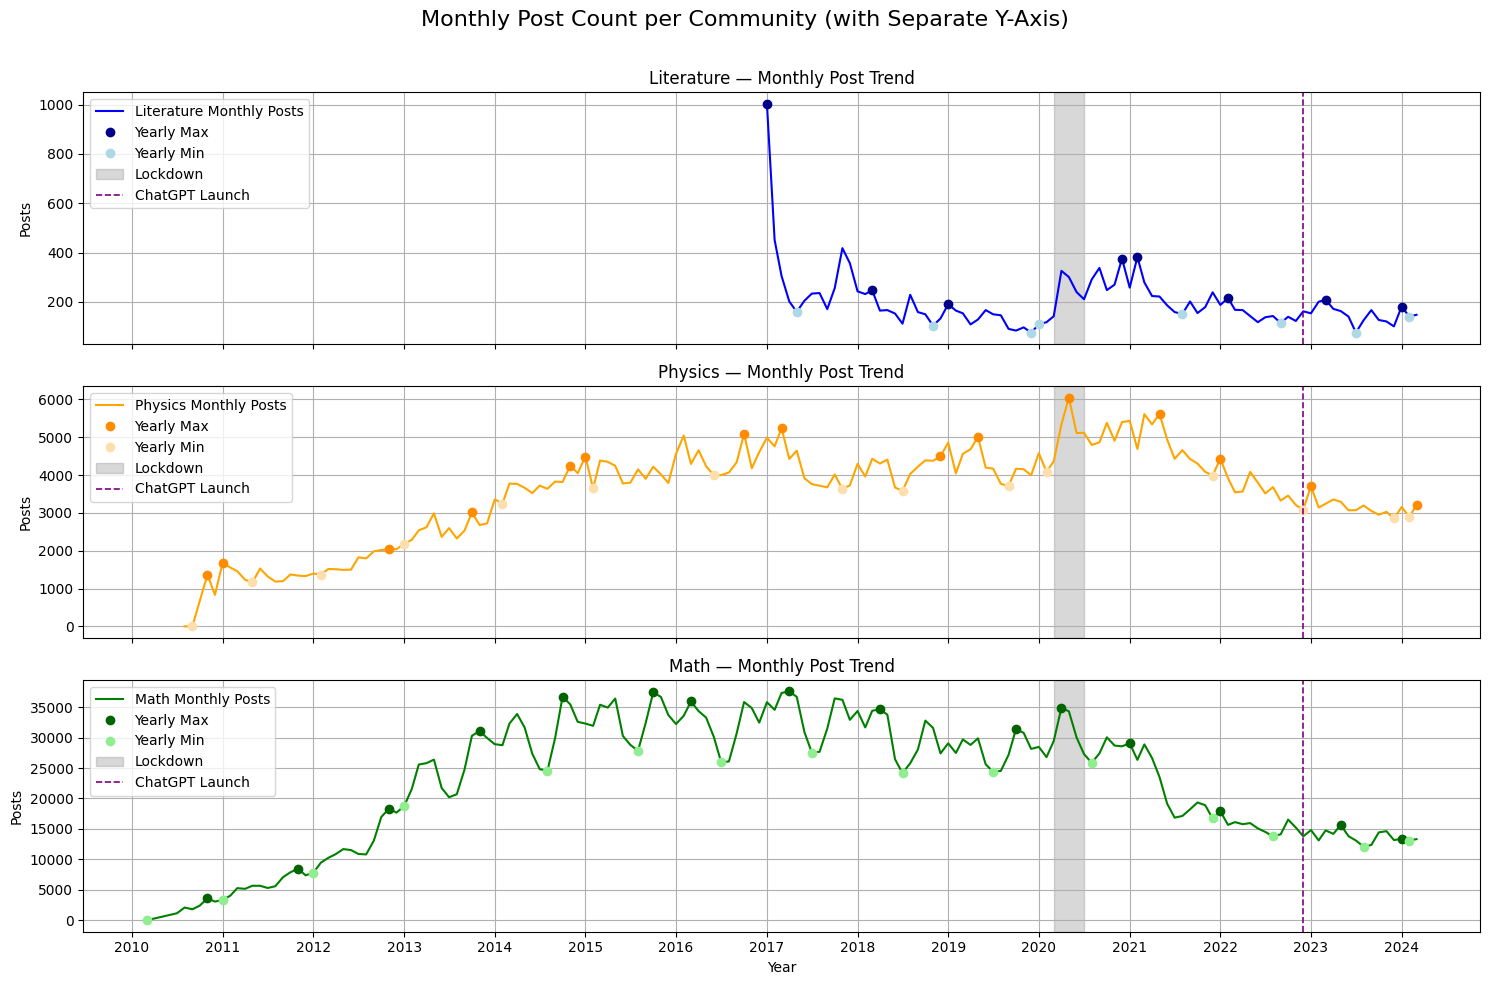

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# 月度发帖数函数
def prepare_monthly_counts(df, community_label):
    df = df.copy()
    df['CreationDate'] = pd.to_datetime(df['CreationDate'])
    df['YearMonth'] = df['CreationDate'].dt.to_period('M')
    monthly_counts = df['YearMonth'].value_counts().sort_index()
    monthly_counts.index = monthly_counts.index.to_timestamp()
    monthly_counts = monthly_counts.rename(community_label)
    return monthly_counts

# 极值提取函数
def get_extremes(series):
    df = series.reset_index()
    df.columns = ['YearMonth', 'PostCount']
    df['Year'] = df['YearMonth'].dt.year
    df = df.sort_values(['Year', 'PostCount', 'YearMonth'])
    max_idx = df.groupby('Year')['PostCount'].idxmax()
    min_idx = df.groupby('Year')['PostCount'].idxmin()
    return df.loc[max_idx], df.loc[min_idx]

# 获取三个社区的月度数据
lit_monthly = prepare_monthly_counts(df_posts_literature, 'Literature')
phy_monthly = prepare_monthly_counts(df_posts_physics, 'Physics')
math_monthly = prepare_monthly_counts(df_posts_math, 'Math')

# 时间对齐
combined = pd.concat([lit_monthly, phy_monthly, math_monthly], axis=1).fillna(0)

# 获取极值
lit_max, lit_min = get_extremes(lit_monthly)
phy_max, phy_min = get_extremes(phy_monthly)
math_max, math_min = get_extremes(math_monthly)

# ====== 绘图（使用3个子图）======
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

communities = [
    ('Literature', 'blue', lit_monthly, lit_max, lit_min),
    ('Physics', 'orange', phy_monthly, phy_max, phy_min),
    ('Math', 'green', math_monthly, math_max, math_min)
]

for ax, (label, color, series, max_df, min_df) in zip(axes, communities):
    ax.plot(series.index, series.values, label=f'{label} Monthly Posts', color=color, linewidth=1.5)
    ax.plot(max_df['YearMonth'], max_df['PostCount'], 'o', color='dark'+color if color != 'orange' else 'darkorange', label='Yearly Max')
    ax.plot(min_df['YearMonth'], min_df['PostCount'], 'o', color='light'+color if color != 'orange' else 'navajowhite', label='Yearly Min')

    # 灰色区：疫情封锁
    ax.axvspan(datetime(2020, 3, 1), datetime(2020, 6, 30), color='gray', alpha=0.3, label='Lockdown')

    # ChatGPT 发布
    chatgpt_launch = datetime(2022, 11, 30)
    ax.axvline(chatgpt_launch, color='purple', linestyle='--', linewidth=1.2, label='ChatGPT Launch')

    ax.set_ylabel("Posts")
    ax.set_title(f"{label} — Monthly Post Trend")
    ax.grid(True)
    ax.legend(loc='upper left')

# 统一设置 X 轴格式
axes[-1].set_xlabel("Year")
axes[-1].xaxis.set_major_locator(mdates.YearLocator())
axes[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.suptitle("Monthly Post Count per Community (with Separate Y-Axis)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


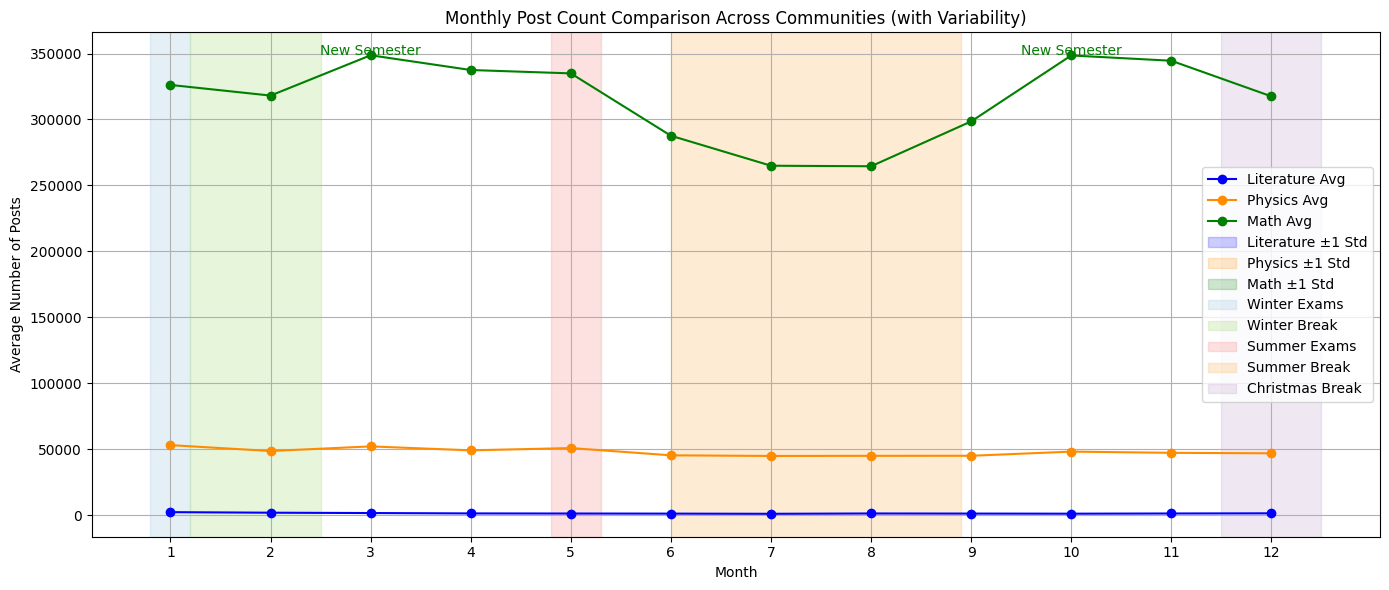

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# === 修改 compute_monthly_stats 函数：按社区返回均值和标准差 ===
def compute_monthly_stats(df, label):
    df = df.copy()
    df['CreationDate'] = pd.to_datetime(df['CreationDate'])
    df['Month'] = df['CreationDate'].dt.month
    monthly_stats_df = (
        df.groupby('Month')['Id']
        .count()
        .groupby(level=0)
        .agg(['mean', 'std'])
        .reset_index()
    )
    monthly_stats_df.columns = ['Month', f'{label}_mean', f'{label}_std']
    return monthly_stats_df

# 分别计算每月均值和标准差
lit_stats = compute_monthly_stats(df_posts_literature, 'Literature')
phy_stats = compute_monthly_stats(df_posts_physics, 'Physics')
math_stats = compute_monthly_stats(df_posts_math, 'Math')

# 合并所有社区数据
merged_stats = lit_stats.merge(phy_stats, on='Month').merge(math_stats, on='Month')

# === 绘图 ===
plt.figure(figsize=(14, 6))

# 绘制三条均值曲线
plt.plot(merged_stats['Month'], merged_stats['Literature_mean'], marker='o', color='blue', label='Literature Avg')
plt.plot(merged_stats['Month'], merged_stats['Physics_mean'], marker='o', color='darkorange', label='Physics Avg')
plt.plot(merged_stats['Month'], merged_stats['Math_mean'], marker='o', color='green', label='Math Avg')

# 三个社区的标准差阴影
plt.fill_between(
    merged_stats['Month'],
    merged_stats['Literature_mean'] - merged_stats['Literature_std'],
    merged_stats['Literature_mean'] + merged_stats['Literature_std'],
    color='blue', alpha=0.2, label='Literature ±1 Std'
)
plt.fill_between(
    merged_stats['Month'],
    merged_stats['Physics_mean'] - merged_stats['Physics_std'],
    merged_stats['Physics_mean'] + merged_stats['Physics_std'],
    color='darkorange', alpha=0.2, label='Physics ±1 Std'
)
plt.fill_between(
    merged_stats['Month'],
    merged_stats['Math_mean'] - merged_stats['Math_std'],
    merged_stats['Math_mean'] + merged_stats['Math_std'],
    color='green', alpha=0.2, label='Math ±1 Std'
)

# 添加假期/考试区间背景
plt.axvspan(0.8, 1.2, color='#a6cee3', alpha=0.3, label="Winter Exams")
plt.axvspan(1.2, 2.5, color='#b2df8a', alpha=0.3, label="Winter Break")
plt.axvspan(4.8, 5.3, color='#fb9a99', alpha=0.3, label="Summer Exams")
plt.axvspan(6.0, 8.9, color='#fdbf6f', alpha=0.3, label="Summer Break")
plt.axvspan(11.5, 12.5, color='#cab2d6', alpha=0.3, label="Christmas Break")

# 添加“新学期”文字
y_max = max(
    merged_stats['Literature_mean'].max(),
    merged_stats['Physics_mean'].max(),
    merged_stats['Math_mean'].max()
)
plt.text(3, y_max + 50, "New Semester", ha='center', color='green')
plt.text(10, y_max + 50, "New Semester", ha='center', color='green')

# 图形美化
plt.title("Monthly Post Count Comparison Across Communities (with Variability)")
plt.xlabel("Month")
plt.ylabel("Average Number of Posts")
plt.xticks(range(1, 13))
plt.grid(True)

# 去重图例
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()


C:\Users\jiali\AppData\Local\Temp\ipykernel_24332\2330375055.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g['AnswerCount'] == 0).mean())
C:\Users\jiali\AppData\Local\Temp\ipykernel_24332\2330375055.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g['AnswerCount'] == 0).mean())
C:\Users\jiali\AppData\Local\Temp\ipykernel_24332\2330375055.py:13: DeprecationWarni

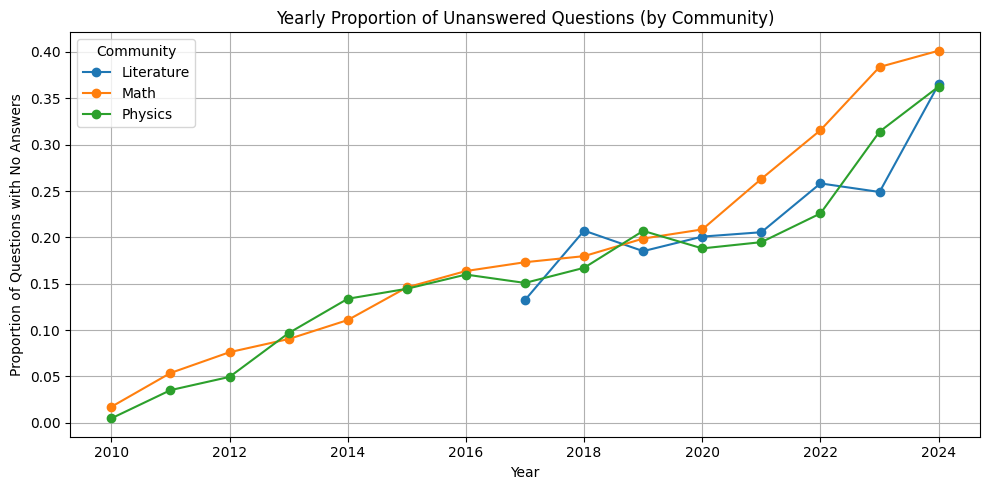

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def compute_no_answer_rate(df, community_label):
    df = df.copy()
    df['CreationDate'] = pd.to_datetime(df['CreationDate'])
    df['Year'] = df['CreationDate'].dt.year
    questions = df[df['PostTypeId'] == 1].copy()
    
    # 每年无人回答问题的比例
    stats = (
        questions.groupby('Year')
        .apply(lambda g: (g['AnswerCount'] == 0).mean())
        .reset_index(name='NoAnswerRate')
    )
    stats['Community'] = community_label
    return stats

# 分别计算三个社区的无人回答率
lit_stats = compute_no_answer_rate(df_posts_literature, 'Literature')
phy_stats = compute_no_answer_rate(df_posts_physics, 'Physics')
math_stats = compute_no_answer_rate(df_posts_math, 'Math')

# 合并结果
all_stats = pd.concat([lit_stats, phy_stats, math_stats], ignore_index=True)

# ===== 绘图 =====
plt.figure(figsize=(10, 5))
for community, group in all_stats.groupby('Community'):
    plt.plot(group['Year'], group['NoAnswerRate'], marker='o', label=community)

plt.title("Yearly Proportion of Unanswered Questions (by Community)")
plt.xlabel("Year")
plt.ylabel("Proportion of Questions with No Answers")
plt.grid(True)
plt.legend(title="Community")
plt.tight_layout()
plt.show()


In [25]:

def compute_sentiment_percentage(df, community_name):
    sentiment_counts = df['SentimentLabel'].value_counts(normalize=True) * 100
    sentiment_df = sentiment_counts.rename_axis('SentimentLabel').reset_index(name='Percentage')
    sentiment_df['Community'] = community_name
    return sentiment_df

# 分别处理
lit_pct = compute_sentiment_percentage(df_posts_literature, 'Literature')
phy_pct = compute_sentiment_percentage(df_posts_physics, 'Physics')
math_pct = compute_sentiment_percentage(df_posts_math, 'Math')

# 合并结果（仅这三个小表）
sentiment_pct = pd.concat([lit_pct, phy_pct, math_pct], ignore_index=True)


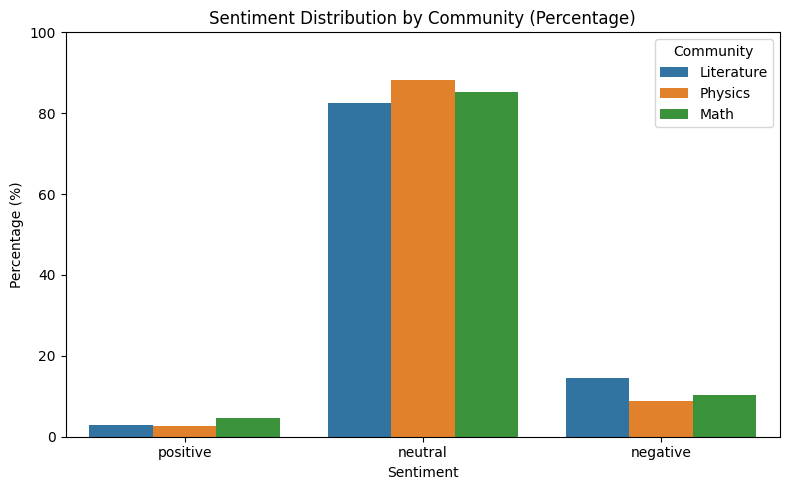

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=sentiment_pct,
    x='SentimentLabel',
    y='Percentage',
    hue='Community',
    order=['positive', 'neutral', 'negative']
)

plt.title("Sentiment Distribution by Community (Percentage)")
plt.xlabel("Sentiment")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.legend(title='Community')
plt.tight_layout()
plt.show()

In [27]:
def monthly_sentiment_trend(df, label):
    df = df.copy()
    df['CreationDate'] = pd.to_datetime(df['CreationDate'])
    df['YearMonth'] = df['CreationDate'].dt.to_period('M')
    trend = df.groupby('YearMonth')['SentimentScore'].mean().reset_index()
    trend['YearMonth'] = trend['YearMonth'].dt.to_timestamp()
    trend['Community'] = label
    return trend

# 分别计算
lit_trend = monthly_sentiment_trend(df_posts_literature, 'Literature')
phy_trend = monthly_sentiment_trend(df_posts_physics, 'Physics')
math_trend = monthly_sentiment_trend(df_posts_math, 'Math')

# 合并小表
sentiment_trend_df = pd.concat([lit_trend, phy_trend, math_trend], ignore_index=True)


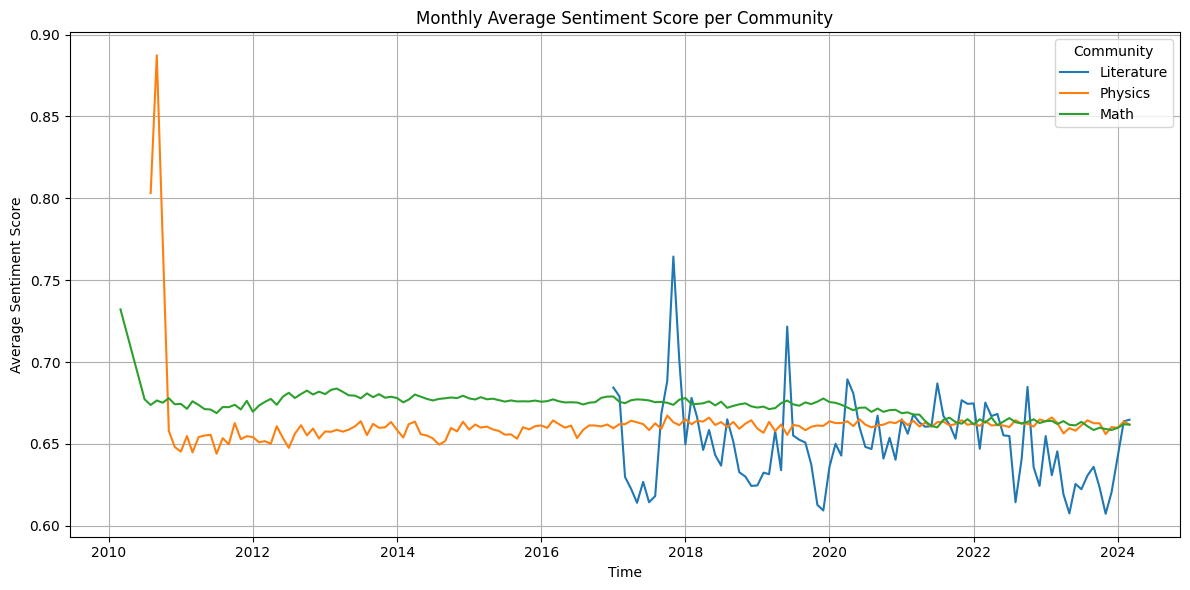

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=sentiment_trend_df,
    x='YearMonth',
    y='SentimentScore',
    hue='Community'
)

plt.title('Monthly Average Sentiment Score per Community')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
def halfyear_label_confidence(df, community_name):
    df = df.copy()
    df['CreationDate'] = pd.to_datetime(df['CreationDate'])

    # 自定义半年周期（例如：2020-01, 2020-07, 2021-01, ...）
    df['HalfYear'] = df['CreationDate'].apply(
        lambda x: pd.Timestamp(year=x.year, month=1 if x.month <= 6 else 7, day=1)
    )

    # 按半年 + 情感标签统计平均置信度
    result = df.groupby(['HalfYear', 'SentimentLabel'])['SentimentScore'].mean().reset_index()
    result['Community'] = community_name
    return result



In [33]:
lit_half = halfyear_label_confidence(df_posts_literature, 'Literature')
phy_half = halfyear_label_confidence(df_posts_physics, 'Physics')
math_half = halfyear_label_confidence(df_posts_math, 'Math')

# 合并所有结果
halfyear_conf_df = pd.concat([lit_half, phy_half, math_half], ignore_index=True)



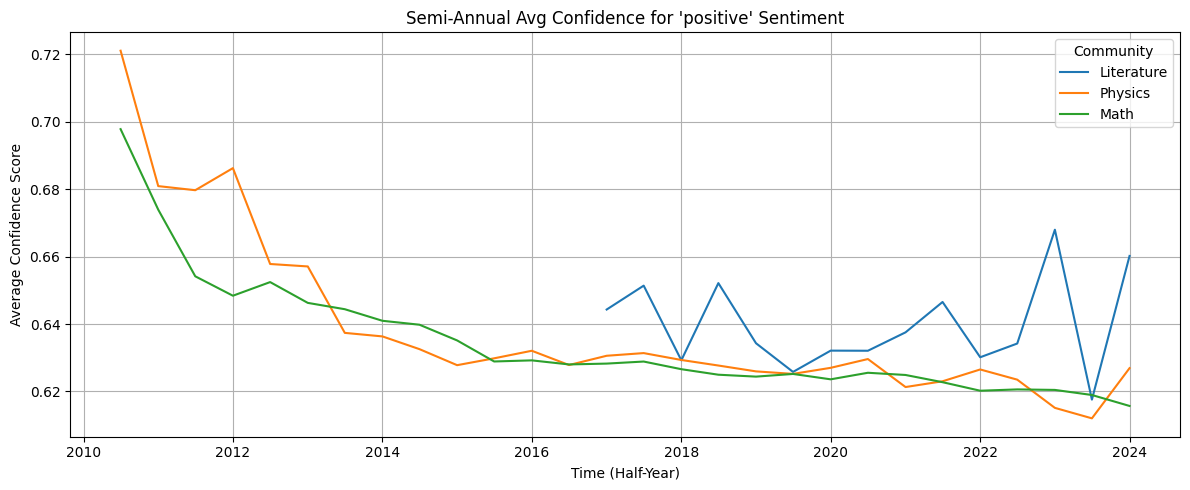

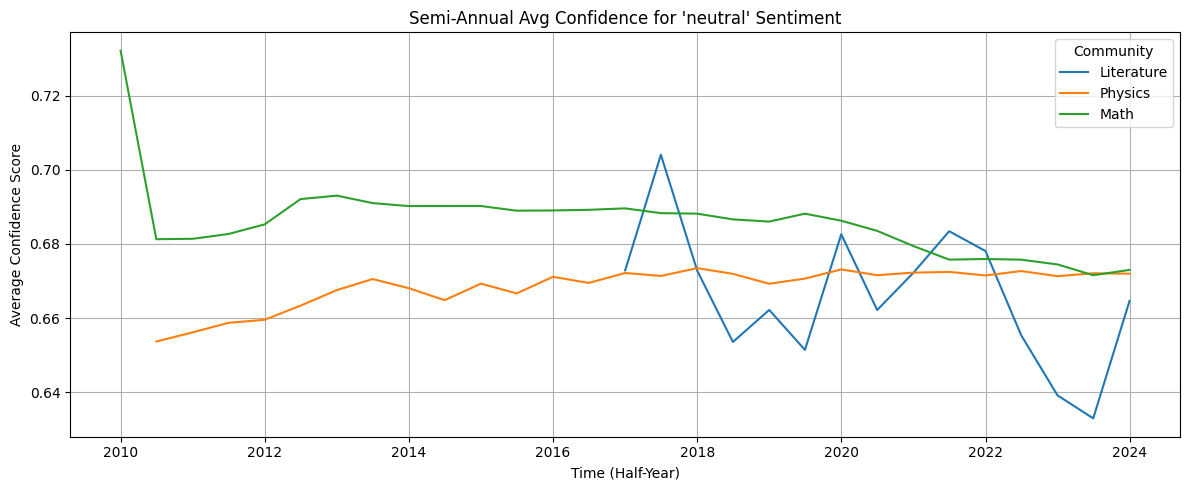

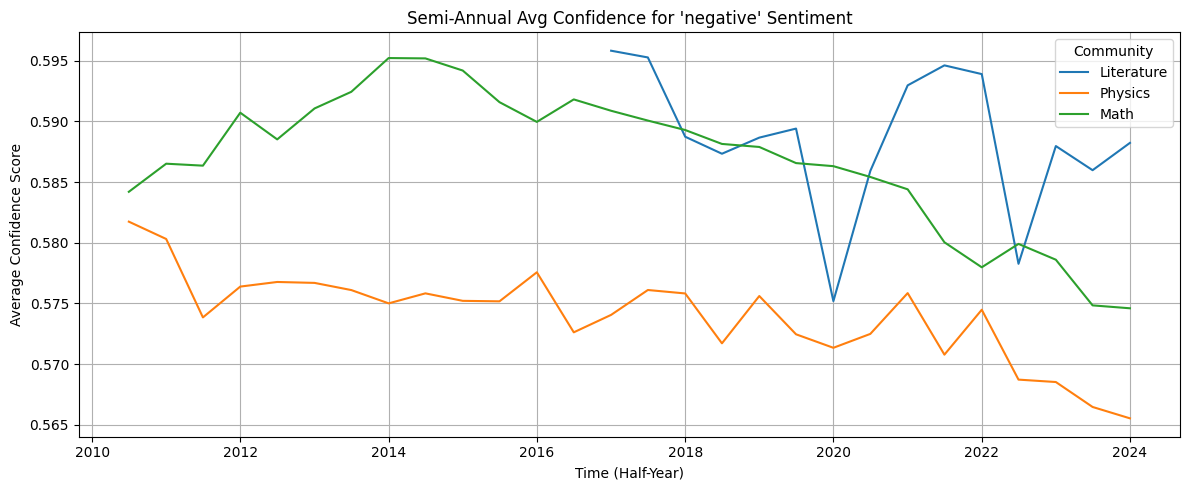

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

for label in ['positive', 'neutral', 'negative']:
    plt.figure(figsize=(12, 5))
    subset = halfyear_conf_df[halfyear_conf_df['SentimentLabel'] == label]
    
    sns.lineplot(
        data=subset,
        x='HalfYear',
        y='SentimentScore',
        hue='Community'
    )
    
    plt.title(f"Semi-Annual Avg Confidence for '{label}' Sentiment")
    plt.xlabel("Time (Half-Year)")
    plt.ylabel("Average Confidence Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [35]:
def compute_sentiment_ratio_per_year(df, community_name):
    df = df.copy()
    df['CreationDate'] = pd.to_datetime(df['CreationDate'])
    df['Year'] = df['CreationDate'].dt.year
    df = df[df['SentimentLabel'].notnull()]

    # 每年每类情感的数量
    yearly_counts = df.groupby(['Year', 'SentimentLabel']).size().reset_index(name='Count')
    # 每年总数
    yearly_total = df.groupby('Year').size().reset_index(name='Total')

    # 合并
    df_plot = pd.merge(yearly_counts, yearly_total, on='Year')
    df_plot['Percent'] = df_plot['Count'] / df_plot['Total']
    df_plot['Community'] = community_name
    return df_plot


In [36]:
lit_plot = compute_sentiment_ratio_per_year(df_posts_literature, 'Literature')
phy_plot = compute_sentiment_ratio_per_year(df_posts_physics, 'Physics')
math_plot = compute_sentiment_ratio_per_year(df_posts_math, 'Math')

# 合并所有
df_sentiment_all = pd.concat([lit_plot, phy_plot, math_plot], ignore_index=True)
#

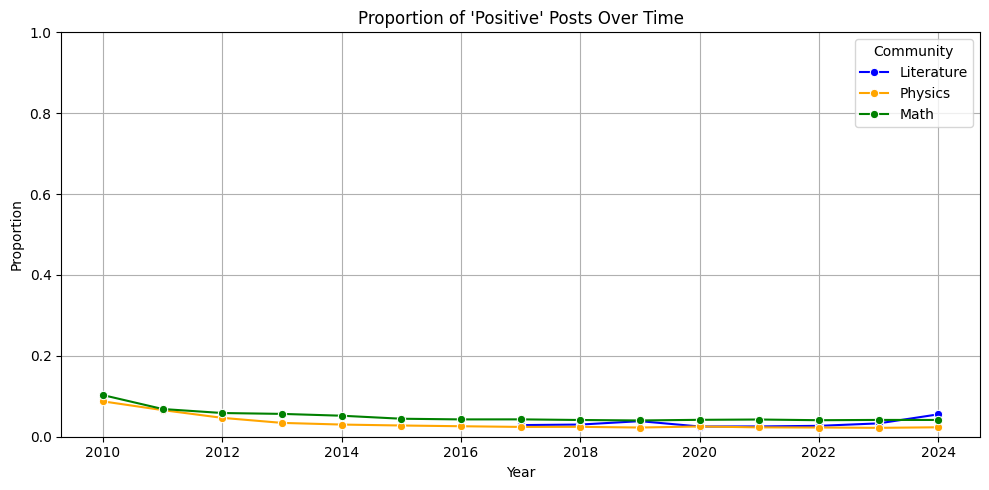

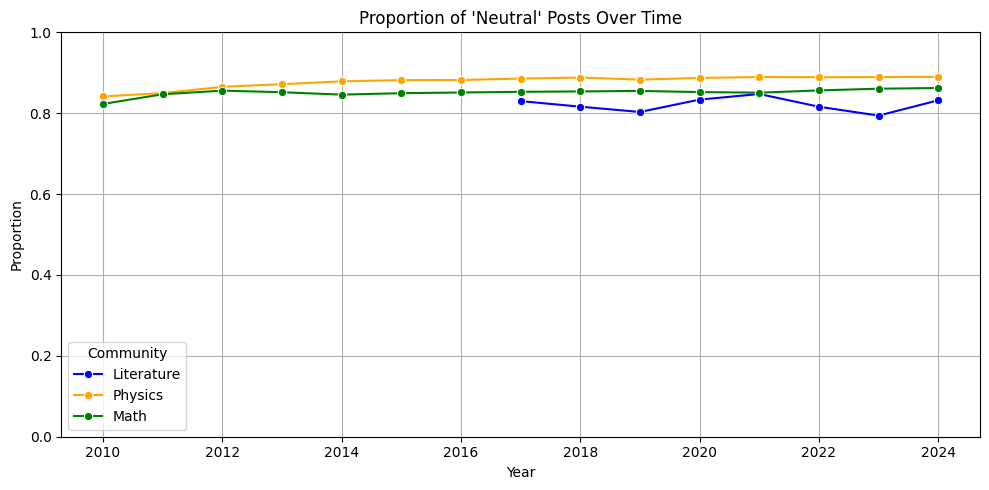

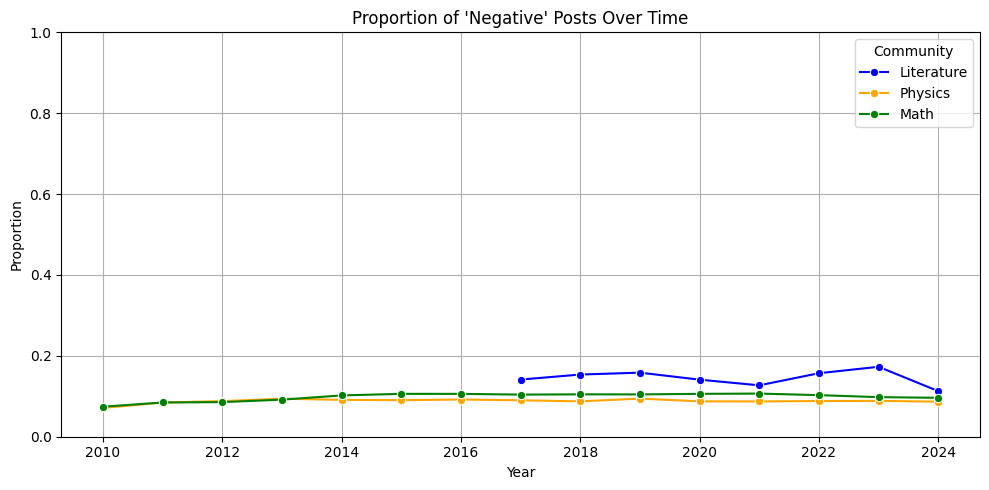

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

color_map = {
    'Literature': 'blue',
    'Physics': 'orange',
    'Math': 'green'
}

sentiments = ['positive', 'neutral', 'negative']

for sentiment in sentiments:
    plt.figure(figsize=(10, 5))
    subset = df_sentiment_all[df_sentiment_all['SentimentLabel'] == sentiment]
    sns.lineplot(data=subset, x='Year', y='Percent', hue='Community', palette=color_map, marker='o')
    plt.title(f"Proportion of '{sentiment.capitalize()}' Posts Over Time")
    plt.ylabel("Proportion")
    plt.xlabel("Year")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
